In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://pycourse.s3.amazonaws.com/bike-sharing.csv")

In [5]:
df.shape

(17379, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17379 non-null  object 
 1   rec_id             17379 non-null  int64  
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [8]:
df.head()

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.describe()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [260]:
print('A média da coluna windspeed é: ', df['windspeed'].mean())

A média da coluna windspeed é:  0.1900976063064631


In [261]:
print('A média da coluna temp é: ', df['temp'].mean())

A média da coluna temp é:  0.4969871684216586


In [11]:
from datetime import datetime as dt

In [24]:
#tranformando a coluna datetime de series para date
df['datetime_dt'] = pd.to_datetime(df['datetime'])

pandas.core.series.Series

In [40]:
#criando uma coluna com os anos da datetime e contando a quantidade de dados em cada ano
df['datetime_year'] = df['datetime_dt'].dt.year
df['datetime_year'].value_counts()

2012    8734
2011    8645
Name: datetime_year, dtype: int64

In [257]:
#verificando a codificação da coluna YEAR
df.groupby('datetime_year').agg({'year':'mean'})

,year
datetime_year,
2011,0
2012,1


In [45]:
#Locações por ano
df.groupby('datetime_year').agg({'total_count':'sum'})

,total_count
datetime_year,
2011,1243103
2012,2049576


In [47]:
#Locações por estação
df.groupby('season').agg({'total_count':'mean'})

,total_count
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


In [96]:
#criando uma lista com as médias por estação
seq = range(0,4)
xlabel = []
for i in seq:
    j=i+1
    media = str(round(df.loc[(df.season == j),'total_count'].mean(),2))
    xlabel.append(media)

print(xlabel)

['111.11', '208.34', '236.02', '198.87']


In [250]:
# Maior média de Locações por estação
df1 = df.groupby('season').mean().reset_index()
df1.loc[df1['total_count']>=df1['total_count'].max(),['season','total_count']]

,season,total_count
2,3,236.016237


In [251]:
# Menor média de Locações por estação
df1.loc[df1['total_count']<=df1['total_count'].min(),['season','total_count']]

,season,total_count
0,1,111.114569


In [98]:
#gráfico usando o MATPLOTLIB
import matplotlib

Text(0, 0.5, 'Mean')

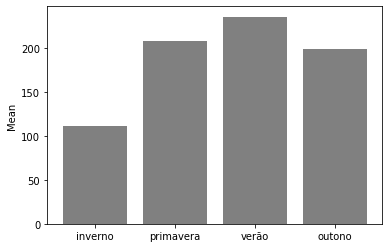

In [252]:
labels = ['inverno', 'primavera', 'verão', 'outono']
x = np.arange(len(labels))
fig, ax = plt.subplots()
df1 = df.groupby('season').mean().reset_index()
ax.bar(range(len(df1)), df1['total_count'], color="gray")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean')

In [109]:
#gráficos usando o SEABORN
import seaborn as sns

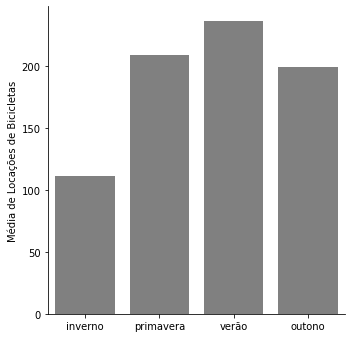

In [253]:
#usando o CATPLOT
bx = sns.catplot(x='season',y='total_count',data = df1,kind = 'bar', color = 'gray')
bx.set_xticklabels(labels)
bx.set_axis_labels("", "Média de Locações de Bicicletas")

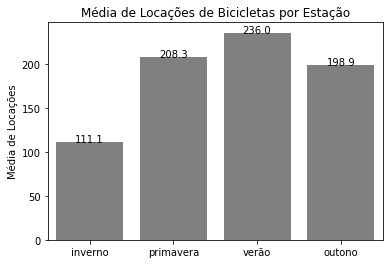

In [254]:
#usando o BARPLOT
labels = ['inverno', 'primavera', 'verão', 'outono']
bx = sns.barplot(x='season',y='total_count',data = df1, color = 'gray')
bx.set_xticklabels(labels)
bx.set(xlabel='', ylabel='Média de Locações', title='Média de Locações de Bicicletas por Estação')

for index, row in df1.iterrows():
    bx.text(row.name,row.total_count, round(row.total_count,1), color='black', ha="center")

In [255]:
# Maior média de Locações por Hora do Dia
df2 = df.groupby('hour').mean().reset_index()
df2.loc[df2['total_count']>=df2['total_count'].max(),['hour','total_count']]

,hour,total_count
17,17,461.452055


In [256]:
# Menor média de Locações por Hora do Dia
df2.loc[df2['total_count']<=df2['total_count'].min(),['hour','total_count']]

,hour,total_count
4,4,6.352941


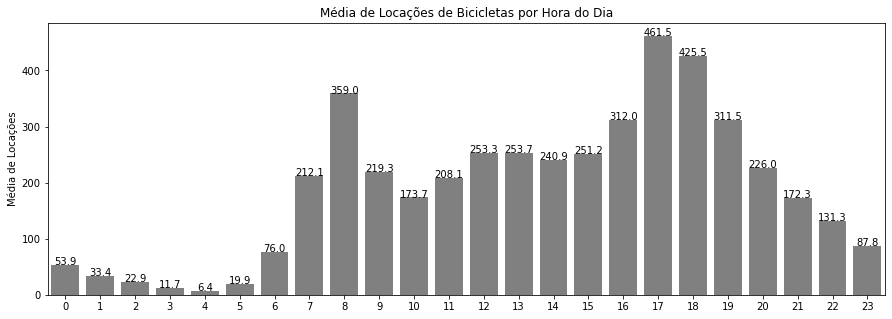

In [167]:
df2 = df.groupby('hour').mean().reset_index()
plt.subplots(figsize=(15, 5)) 
bx = sns.barplot(x='hour',y='total_count',data = df2, color = 'gray')
bx.set(xlabel='', ylabel='Média de Locações', title='Média de Locações de Bicicletas por Hora do Dia')

for index, row in df2.iterrows():
    bx.text(row.name,row.total_count, round(row.total_count,1), color='black', ha="center")

In [168]:
#Locações por dia da semana
df.groupby('weekday').agg({'total_count':'mean'})

,total_count
weekday,
0,177.468825
1,183.744655
2,191.238891
3,191.130505
4,196.436665
5,196.135907
6,190.209793


In [248]:
# Maior média de locações por Dia da Semana
df3 = df.groupby('weekday').mean().reset_index()
df3.loc[df3['total_count']>=df3['total_count'].max(),['weekday','total_count']]

,weekday,total_count
4,4,196.436665


In [249]:
# Menor média de locações por Dia da Semana
df3.loc[df3['total_count']<=df3['total_count'].min(),['weekday','total_count']]

,weekday,total_count
0,0,177.468825


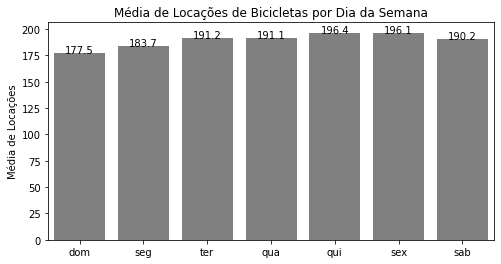

In [258]:
labels = ['dom', 'seg', 'ter', 'qua','qui','sex','sab']
plt.subplots(figsize=(8, 4)) 
bx = sns.barplot(x='weekday',y='total_count',data = df3, color = 'gray')
bx.set_xticklabels(labels)
bx.set(xlabel='', ylabel='Média de Locações', title='Média de Locações de Bicicletas por Dia da Semana')

for index, row in df3.iterrows():
    bx.text(row.name,row.total_count, round(row.total_count,1), color='black', ha="center")

In [234]:
#Horário do dia que contém a maior média de locações de bicicletas às quartas-feiras:
agg1 = df.loc[(df.weekday==3)].groupby(['hour']).agg({'total_count':'mean'})
agg1.loc[agg1['total_count']>=agg1['total_count'].max()]

,total_count
hour,
17,513.144231


In [236]:
#Horário do dia que contém a maior média de locações de bicicletas aos sábados:
agg2 = df.loc[(df.weekday==6)].groupby(['hour']).agg({'total_count':'mean'})
agg2.loc[agg2['total_count']>=agg2['total_count'].max()]

,total_count
hour,
13,385.371429
